## 1. 전국 도시 공원 표준데이터


- 전국 도시 공원 표준데이터에는 데이터 전처리 해보기 좋은 데이터가 많다.
- 시간,결측치, 이상치, 수치형, 범주형 데이터를 고르게 볼수 있으며 다양한 텍스트 데이터 처리를 해보자
- 또한 정규표현식을 활용해서 텍스트 데이터 전처리와 데이터 마스킹 기법에 대해 다뤄보자
- 어떤공원이 어느지역에 어떻게 분표되어 있는지를 경도로 표현

### 1.1 판다스 프로파일링, 워드클라우드 다운

In [1]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas!=1.4.0,<1.6,>1.1 in c:\users\sun\anaconda3\lib\site-packages (from pandas-profiling) (1.4.2)



In [2]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


### 1.2 분석에 사용할 도구 불러오기

In [1]:
# 필요한 라이브러리 로드 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

%matplotlib inline


In [2]:
#seaborn의 set기능을 통해 폰트 설정
sns.set(font='Malgun Gothic', rc={"axes.unicode_minus":False},style='darkgrid')

<AxesSubplot:title={'center':'한글폰트'}>

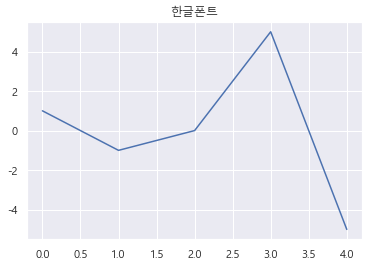

In [3]:
#폰트테스트
pd.Series([1,-1,0,5,-5]).plot(title='한글폰트')

In [6]:
#글씨색 진하게 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\김선림\AppData\Local\Temp\ipykernel_15996\2378846310.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


### 1.3 데이터로드 

In [4]:
%ls data_apt


df = pd.read_csv('data_apt/전국도시공원표준데이터/전국도시공원표준데이터.csv', encoding='cp949')
df.shape

#18137개, 20개 컬럼

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 866A-7EEA

 C:\Users\김선림\data_apt 디렉터리

2022-09-07  오전 12:42    <DIR>          .
2022-09-07  오전 12:42    <DIR>          ..
2022-09-07  오전 12:42    <DIR>          상가상권정보
2022-09-07  오전 12:42    <DIR>          전국도시공원표준데이터
2022-09-07  오전 12:42    <DIR>          전국신규민간아파트분양가격동향
               0개 파일                   0 바이트
               5개 디렉터리  440,443,162,624 바이트 남음


(18137, 20)

In [5]:
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
3,26440-00004,용두공원,어린이공원,NaN,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,NaN,"조합놀이기구, 그네",NaN,NaN,"정자, 농구장, 평의자6",1998-07-25,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
4,26440-00005,새동내공원,어린이공원,NaN,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,8,"조합놀이기구, 그네, 흔들놀이기구2",NaN,NaN,"정자, 평의자14, 트렐리스2, 안내판, 볼라드",1995-04-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN


### 1.4 Pandas Profiling

In [22]:
import pandas_profiling 

pandas_profiling.__version__

'3.4.0'

In [23]:
!pip show pandas_profiling 

Name: pandas-profiling
Version: 3.4.0
Summary: Generate profile report for pandas DataFrame
Home-page: https://github.com/ydataai/pandas-profiling
Author: YData Labs Inc
Author-email: opensource@ydata.ai
License: MIT
Location: c:\users\sun\anaconda3\lib\site-packages
Requires: missingno, requests, scipy, seaborn, multimethod, matplotlib, visions, jinja2, tqdm, statsmodels, numpy, pandas, phik, PyYAML, pydantic, htmlmin
Required-by: 


In [24]:
#ProfileReport 임포트 하기 

from pandas_profiling  import ProfileReport

%time profile =ProfileReport(df,title='도시공원 표준 데이터')
profile.to_file(output_file='05-park_pandas_profile.html') #무거워서 html파일로 저장 

CPU times: total: 31.2 ms
Wall time: 3.01 ms


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\sun\anaconda3\lib\site-packages\pandas_profiling\model\correlations.py:67: UserWarning: There was an attempt to calculate the phi_k correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"phi_k": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: ''ascii' codec can't encode characters in position 18-20: ordinal not in range(128)')
  warnings.warn(
C:\Users\sun\anaconda3\lib\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  plt.savefig(
C:\Users\sun\anaconda3\lib\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.savefig(
C:\Users\sun\anaconda3\lib\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning: Gl

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\sun\anaconda3\lib\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  plt.savefig(
C:\Users\sun\anaconda3\lib\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning: Glyph 47536 (\N{HANGUL SYLLABLE RIN}) missing from current font.
  plt.savefig(
C:\Users\sun\anaconda3\lib\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.savefig(
C:\Users\sun\anaconda3\lib\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  plt.savefig(
C:\Users\sun\anaconda3\lib\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.savefig(
C:\Users\sun\anaconda3\lib\site-packages\pandas_profiling\visualisation\utils.py:73: UserWarning: Glyph 44540 (

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 1.5 기본정보보기 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18137 non-null  object 
 1   공원명           18137 non-null  object 
 2   공원구분          18137 non-null  object 
 3   소재지도로명주소      8039 non-null   object 
 4   소재지지번주소       17158 non-null  object 
 5   위도            18137 non-null  float64
 6   경도            18137 non-null  float64
 7   공원면적          18137 non-null  float64
 8   공원보유시설(운동시설)  4845 non-null   object 
 9   공원보유시설(유희시설)  6964 non-null   object 
 10  공원보유시설(편익시설)  5084 non-null   object 
 11  공원보유시설(교양시설)  1160 non-null   object 
 12  공원보유시설(기타시설)  3116 non-null   object 
 13  지정고시일         15225 non-null  object 
 14  관리기관명         17383 non-null  object 
 15  전화번호          16957 non-null  object 
 16  데이터기준일자       18137 non-null  object 
 17  제공기관코드        18137 non-null  object 
 18  제공기관명         18137 non-nu

In [6]:
#결측치 수 구하기 
df.isnull().sum()

# 특정 값에 매우 많음

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10098
소재지지번주소           979
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13292
공원보유시설(유희시설)    11173
공원보유시설(편익시설)    13053
공원보유시설(교양시설)    16977
공원보유시설(기타시설)    15021
지정고시일            2912
관리기관명             754
전화번호             1180
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     18137
dtype: int64

In [7]:
round(df.isnull().mean()*100)
#결측치 비율로 보기

관리번호              0.0
공원명               0.0
공원구분              0.0
소재지도로명주소         56.0
소재지지번주소           5.0
위도                0.0
경도                0.0
공원면적              0.0
공원보유시설(운동시설)     73.0
공원보유시설(유희시설)     62.0
공원보유시설(편익시설)     72.0
공원보유시설(교양시설)     94.0
공원보유시설(기타시설)     83.0
지정고시일            16.0
관리기관명             4.0
전화번호              7.0
데이터기준일자           0.0
제공기관코드            0.0
제공기관명             0.0
Unnamed: 19     100.0
dtype: float64

### 1.6 결측치 시각화



<AxesSubplot:>

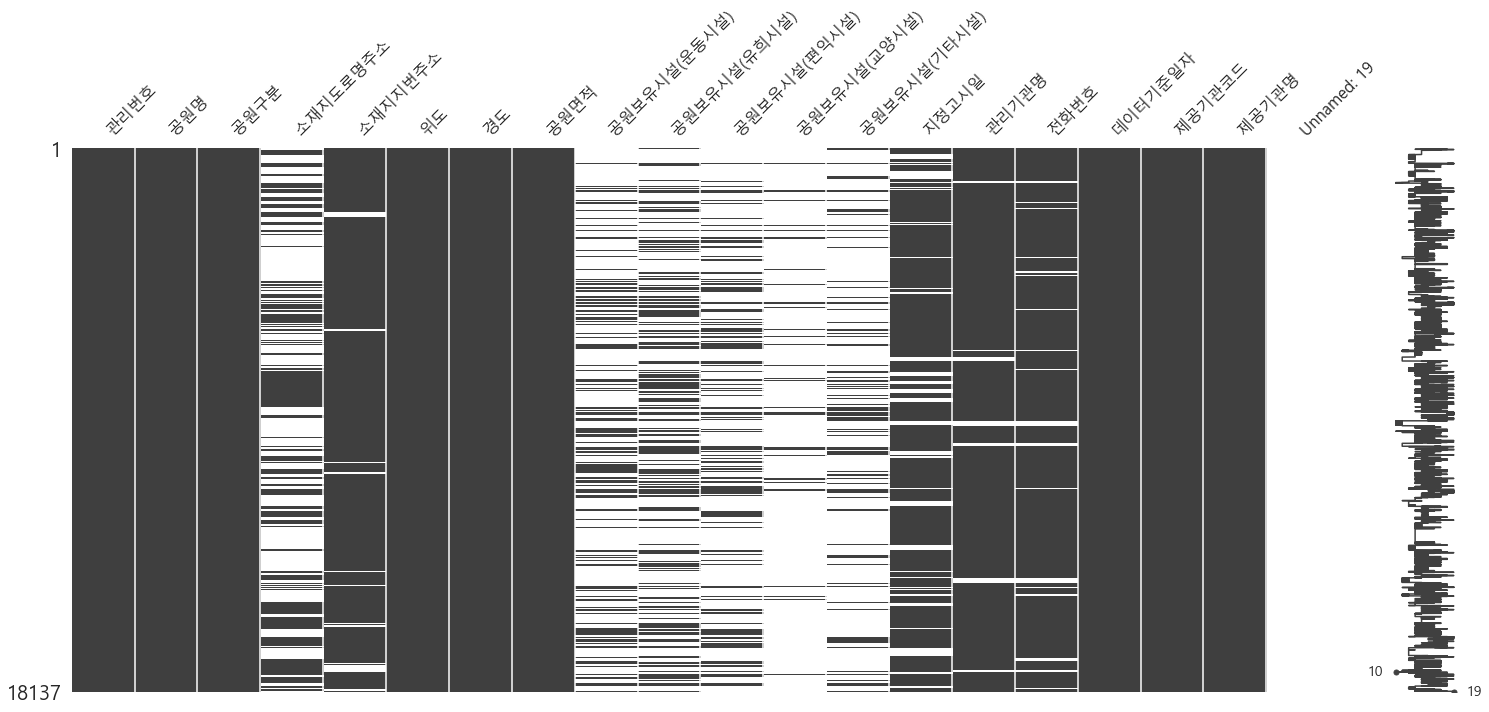

In [8]:
import missingno

missingno.matrix(df)

<AxesSubplot:>

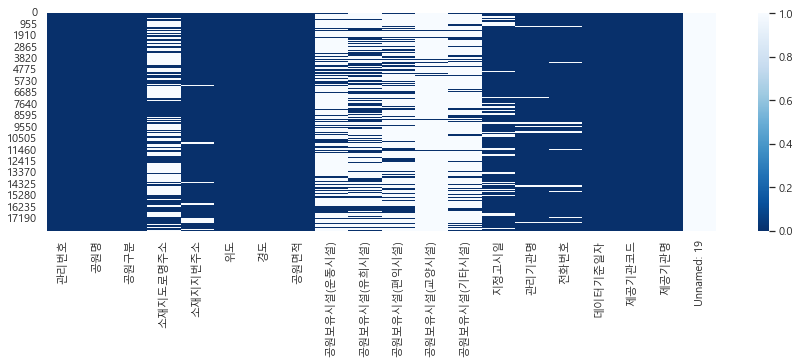

In [9]:
#결측값 표시
null=df.isnull()


plt.figure(figsize=(15,4))
sns.heatmap(null,cmap='Blues_r')


## 2. 데이터 전처리

- 불필요한 컬럼제거 
- 시도 결측치 처리 > 다른 데이터로 대체, 도로명 혹은 지번중 둘중 하나만 있다면 있는 데이터로 대체 
- 아웃라이어 데이터 제거 혹은 대체 


### 2.1 불필요한 컬럼제거

In [10]:
df.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [11]:
#drop 으로 unamed:19 제거 
df=df.drop(['Unnamed: 19'],axis=1)
print(df.shape)

(18137, 19)


### 2.2 결측치 대체 

### 2.2.1 도로명 주소와 지번주소 


In [12]:
#도로명 주소 널값 수 

df['소재지도로명주소'].isnull().sum()


10098

In [13]:
#지방주소 넓값 수

df['소재지지번주소'].isnull().sum()

979

In [14]:
#도로명주소와 지번주소가 모두 결측치가 아닌 데이터 찾기 

df[df['소재지도로명주소'].notnull()&df['소재지지번주소'].notnull()].shape

(7060, 19)

In [15]:
#도로명주소의 결측치를 fillna를 통해 지번주소로 채우기 

df['소재지도로명주소']=df['소재지도로명주소'].fillna(df['소재지지번주소'])
df['소재지도로명주소'].isnull().sum()

#도로명주소 결측치는 지번주소로 채워줌 
# 다른 값으로 대체

0

In [16]:
# 둘다 모두 결측치 데이터 찾기

df[df['소재지도로명주소'].isnull()&df['소재지지번주소'].isnull()].shape

(0, 19)

### 2.3 파생변수 만들기

In [17]:
# 시도, 구군 변수 생성하기 
#['소재지도로명주소'에서 시도와 구군 따로 뽑아주기

df['소재지도로명주소'].str.split() # 주소를 나눠주기 

0           [부산광역시, 강서구, 구랑동, 1199-7]
1             [부산광역시, 강서구, 구랑동, 1219]
2          [부산광역시, 강서구, 대저1동, 1330-7]
3         [부산광역시, 강서구, 대저2동, 1870-67]
4          [부산광역시, 강서구, 대저2동, 2407-1]
                     ...             
18132         [인천광역시, 동구, 송림동, 291-6]
18133      [경상북도, 영양군, 영양읍, 서부리, 123]
18134    [경상북도, 영양군, 입암면, 신구리, 산27-5]
18135      [경상북도, 영양군, 수비면, 발리리, 산48]
18136      [경상북도, 영양군, 영양읍, 삼지리, 200]
Name: 소재지도로명주소, Length: 18137, dtype: object

In [18]:
#시도 가져오기

df['시도']=df['소재지도로명주소'].str.split(expand=True)[0] ## 모든 값에서 첫번쨰 인덱스만 추출 
df[['소재지도로명주소','시도']].head()

,소재지도로명주소,시도
0,부산광역시 강서구 구랑동 1199-7,부산광역시
1,부산광역시 강서구 구랑동 1219,부산광역시
2,부산광역시 강서구 대저1동 1330-7,부산광역시
3,부산광역시 강서구 대저2동 1870-67,부산광역시
4,부산광역시 강서구 대저2동 2407-1,부산광역시


In [19]:
#구군가져오기 

df['구군']=df['소재지도로명주소'].str.split(expand=True)[1] ## 모든 값에서 첫번쨰 인덱스만 추출 
df[['소재지도로명주소','시도','구군']].head()

,소재지도로명주소,시도,구군
0,부산광역시 강서구 구랑동 1199-7,부산광역시,강서구
1,부산광역시 강서구 구랑동 1219,부산광역시,강서구
2,부산광역시 강서구 대저1동 1330-7,부산광역시,강서구
3,부산광역시 강서구 대저2동 1870-67,부산광역시,강서구
4,부산광역시 강서구 대저2동 2407-1,부산광역시,강서구


In [20]:
#시도 데이터의 빈도수 
df['시도'].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         647
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
강원            1
Name: 시도, dtype: int64

In [21]:
#강원은 강원도로 바꿔주기 

df['시도']=df['시도'].replace('강원','강원도')
df['시도'].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         648
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
Name: 시도, dtype: int64

### 2.4 이상치 제거
- 경도, 위도 이상치 처리하기 

<AxesSubplot:xlabel='경도', ylabel='위도'>

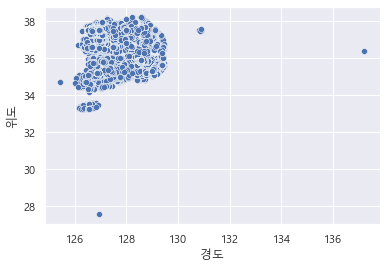

In [22]:
# 위경도 시각화
sns.scatterplot(data=df, x='경도',y='위도')

#이상치 확인 

In [23]:
# 아웃라이어 데이터 제외하고 출력하기 
#경도132 이상인거 제거 ,위도가 32이상인거 제거 

df_park=df[(df['경도']<132) & (df['위도']>32)].copy()

<AxesSubplot:xlabel='경도', ylabel='위도'>

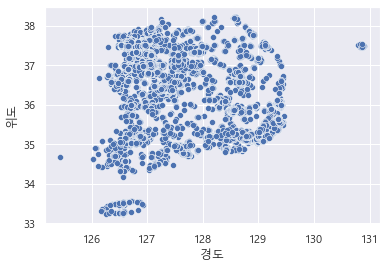

In [24]:
sns.scatterplot(data=df_park, x='경도',y='위도')

In [25]:
#이상치 확인 

df[(df['경도']>132) | (df['위도']<32)]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),...,공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
374,11440-00004,와우공원,근린공원,서울특별시 마포구 창전동3-231 등 59필지,서울특별시 마포구 창전동3-231 등 59필지,27.551606,126.929047,73590.0,NaN,NaN,...,NaN,NaN,1940-03-12,서울특별시 마포구,02-3153-9553,2019-07-22,3130000,서울특별시 마포구,서울특별시,마포구
12926,43113-00080,근린공원5(만수공원),근린공원,충청북도 청주시 흥덕구 오송읍 만수리 512,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258.0,NaN,NaN,...,NaN,NaN,2003-04-18,충청북도 청주시 푸른도시사업본부 공원관리과,043-201-4433,2019-06-21,5710000,충청북도 청주시,충청북도,청주시


### 2.4.1 날짜 데이터 다루기 

In [26]:
# 지정고시일의 데이터 타입 보기 
df['지정고시일'].head()

#오브젝트 타입인데, 데이트 타입으로 변경

0    2011-09-02
1    2008-02-28
2    2013-01-23
3    1998-07-25
4    1995-04-07
Name: 지정고시일, dtype: object

In [27]:
df['지정고시일']=pd.to_datetime(df['지정고시일'])
df['지정고시일'].head()

0   2011-09-02
1   2008-02-28
2   2013-01-23
3   1998-07-25
4   1995-04-07
Name: 지정고시일, dtype: datetime64[ns]

In [28]:
#연도와 월을 지정고시일에서 추출해서 파생변수 만들기 

df['고시연도']=df['지정고시일'].dt.year
df['고시월']=df['지정고시일'].dt.month

df[['고시연도','고시월']].head()

,고시연도,고시월
0,2011.0,9.0
1,2008.0,2.0
2,2013.0,1.0
3,1998.0,7.0
4,1995.0,4.0


In [29]:
#화랑공원의 고시연도 찾아보기 

df.loc[df['공원명'].str.contains('화랑'),['공원명','고시연도']]

,공원명,고시연도
3077,판교제8호(화랑)공원,2004.0
4310,화랑공원,2010.0
7316,화랑공원,1972.0
10490,화랑,2004.0
10763,화랑공원,1980.0
15066,화랑,1991.0


C:\Users\sun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='고시연도', ylabel='Density'>

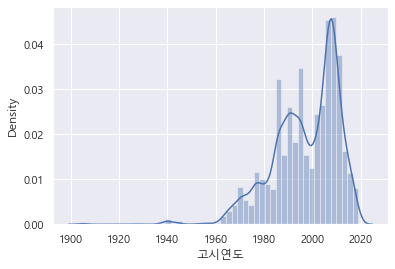

In [30]:
#고시연도의 분포를 distplot으로 그리기
#연도는 int지만 null값이 float타입이라 float으로 나옴

sns.distplot(df.loc[df['고시연도'].notnull(),'고시연도'])

## 2000년도에 공원이 많아짐

In [31]:
#연도와 월별 고시 현황을 povot_table로 그려보기 

year_month=pd.pivot_table(df,index='고시연도',columns='고시월',values='공원명',aggfunc='count')

year_month=year_month[(year_month.index>2000) &(year_month.index<2019)]
year_month

고시월,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
고시연도,,,,,,,,,,,,
2001.0,48.0,12.0,7.0,42.0,21.0,16.0,6.0,16.0,30.0,36.0,37.0,40.0
2002.0,38.0,19.0,18.0,10.0,18.0,14.0,49.0,17.0,7.0,7.0,59.0,55.0
2003.0,21.0,13.0,17.0,19.0,10.0,23.0,4.0,8.0,7.0,18.0,48.0,38.0
2004.0,48.0,18.0,16.0,18.0,13.0,24.0,7.0,48.0,10.0,24.0,59.0,135.0
2005.0,55.0,32.0,18.0,23.0,43.0,33.0,16.0,62.0,18.0,34.0,60.0,105.0
2006.0,84.0,34.0,69.0,31.0,54.0,32.0,18.0,33.0,24.0,36.0,119.0,120.0
2007.0,69.0,12.0,9.0,42.0,16.0,46.0,62.0,66.0,84.0,164.0,245.0,106.0
2008.0,163.0,45.0,77.0,42.0,30.0,102.0,15.0,61.0,32.0,20.0,24.0,126.0
2009.0,59.0,31.0,162.0,135.0,57.0,60.0,36.0,23.0,96.0,27.0,73.0,100.0


In [32]:
year_month.style.background_gradient()

고시월,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000
고시연도,,,,,,,,,,,,
2001.000000,48.000000,12.000000,7.000000,42.000000,21.000000,16.000000,6.000000,16.000000,30.000000,36.000000,37.000000,40.000000
2002.000000,38.000000,19.000000,18.000000,10.000000,18.000000,14.000000,49.000000,17.000000,7.000000,7.000000,59.000000,55.000000
2003.000000,21.000000,13.000000,17.000000,19.000000,10.000000,23.000000,4.000000,8.000000,7.000000,18.000000,48.000000,38.000000
2004.000000,48.000000,18.000000,16.000000,18.000000,13.000000,24.000000,7.000000,48.000000,10.000000,24.000000,59.000000,135.000000
2005.000000,55.000000,32.000000,18.000000,23.000000,43.000000,33.000000,16.000000,62.000000,18.000000,34.000000,60.000000,105.000000
2006.000000,84.000000,34.000000,69.000000,31.000000,54.000000,32.000000,18.000000,33.000000,24.000000,36.000000,119.000000,120.000000
2007.000000,69.000000,12.000000,9.000000,42.000000,16.000000,46.000000,62.000000,66.000000,84.000000,164.000000,245.000000,106.000000
2008.000000,163.000000,45.000000,77.000000,42.000000,30.000000,102.000000,15.000000,61.000000,32.000000,20.000000,24.000000,126.000000
2009.000000,59.000000,31.000000,162.000000,135.000000,57.000000,60.000000,36.000000,23.000000,96.000000,27.000000,73.000000,100.000000


### 2.5 텍스트 데이터 다루기 

- 정규표현식 regexp

In [33]:
# 정규표현식 라이브러리 로드

import re

### 2.6 공원 보유 시설 

In [34]:
#컬럼이 너무 많으면 끝까지 안보임
#options.display사용해서 max_columns 값채우기 
# 글자 다 보이게 하는 것 

pd.options.display.max_columns=100

In [35]:
df.head(1)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,고시연도,고시월
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2011.0,9.0


In [36]:
df["공원보유시설(운동시설)"].value_counts(sort=False).head(5)

4    23
7    14
8     9
5    27
6    25
Name: 공원보유시설(운동시설), dtype: int64

### 2.6.1 운동시설 

In [37]:
#공원보유시설(운동시설) 유니크값 구하고 리스트 형태로 만들기 

gym= df['공원보유시설(운동시설)'].unique().tolist()
gym=str(gym) #각 문자별로 보기 
gym[:1000]


"['4', '7', nan, '8', '5', '6', '3', '10', '14', '9', '30', '2', '13', '12', '40', '17', '-', '농구장', '궁도장', '풋살구장', '풋살구장, 농구장, 인라인스케이트장', '축구장', '족구장', '게이트볼장', '운동기구14개, 농구장2개소, 족구장1개소', '운동기구6개, 족구장1개소', '운동기구10개', '운동기구4개', '운동기구7개', '에어로빅장, 농구장', '테니스장, 씨름장, 농구장', '바디싣업1,스트레칭롤러1,전신돌리기1,허리안마기1,허리비틀기1', 'TM스탭사이클1,TM체어웨이트1,TM트윈바디싣업1,TM트윈트위스트1,TM크로스컨트리1,TM풀웨이트1', '철봉1', '하늘걷기1,마라톤운동1,허리돌리기1,3단철봉,윗몸일으키기1', '철봉1,팔굽혀펴기1,몸통돌리기1,허리좌우로흔들기1', '스트레칭롤러1,풀웨이트1,바웨이트1', '하늘걷기1,온몸허리돌리기1,스트레칭기1,거꾸로매달리기1', '하늘걷기1,온몸허리돌리기1,등허리지압기1,철봉3', '스탭싸이클1,풀웨이트1,트리플트위스트2,트윈바디싣업1,크로스컨트리1,스트레칭롤러1,트윈워밍암1', '하늘걷기2,스탭싸이클1,체어폴1,철봉1,트리플트위스트2,트윈바디싣업1', '윗몸일으키기1,온몸허리돌리기1,팔굽혀펴기1,다리뻗치기1,온몸허리돌리기1,거꾸로매달리기1', '하늘걷기1,온몸허리돌리기1,옆파도타기1', '크로스워킹+스카이워킹1,파워프레스+풀웨이트1,싸이클론+트위스트1,스탠드업+마사지롤1,사이드스윙+터닝암1,푸시웨이트+레그프레스1', '평행봉1', '트윈바디싣업1,트윈트위스트1,스탭싸이클1,크로스컨트리1,체어풀1', '크로스컨트리1,자전거팔뻗기2,등안마기1,트윈워밍암1,체어웨이트1,오버턴스트레칭1', '크로스컨트리1,롤링웨이스트1,레그프레스1,트윈트위스트1,체어웨이트1', '족구장1,역기1', '등지압기1,마라톤운동+공중걷기운동1,허리돌리기+온몸돌리기1, 온몸역기올리기+온몸근육풀기1', '트리플트위스트1,트윈바디싣업1,크로스컨

In [38]:
gym = gym.replace("+", ",").replace("'", ",").replace(" ", ",").replace("/", ",")
gym[:1000]

'[,4,,,,7,,,nan,,,8,,,,5,,,,6,,,,3,,,,10,,,,14,,,,9,,,,30,,,,2,,,,13,,,,12,,,,40,,,,17,,,,-,,,,농구장,,,,궁도장,,,,풋살구장,,,,풋살구장,,농구장,,인라인스케이트장,,,,축구장,,,,족구장,,,,게이트볼장,,,,운동기구14개,,농구장2개소,,족구장1개소,,,,운동기구6개,,족구장1개소,,,,운동기구10개,,,,운동기구4개,,,,운동기구7개,,,,에어로빅장,,농구장,,,,테니스장,,씨름장,,농구장,,,,바디싣업1,스트레칭롤러1,전신돌리기1,허리안마기1,허리비틀기1,,,,TM스탭사이클1,TM체어웨이트1,TM트윈바디싣업1,TM트윈트위스트1,TM크로스컨트리1,TM풀웨이트1,,,,철봉1,,,,하늘걷기1,마라톤운동1,허리돌리기1,3단철봉,윗몸일으키기1,,,,철봉1,팔굽혀펴기1,몸통돌리기1,허리좌우로흔들기1,,,,스트레칭롤러1,풀웨이트1,바웨이트1,,,,하늘걷기1,온몸허리돌리기1,스트레칭기1,거꾸로매달리기1,,,,하늘걷기1,온몸허리돌리기1,등허리지압기1,철봉3,,,,스탭싸이클1,풀웨이트1,트리플트위스트2,트윈바디싣업1,크로스컨트리1,스트레칭롤러1,트윈워밍암1,,,,하늘걷기2,스탭싸이클1,체어폴1,철봉1,트리플트위스트2,트윈바디싣업1,,,,윗몸일으키기1,온몸허리돌리기1,팔굽혀펴기1,다리뻗치기1,온몸허리돌리기1,거꾸로매달리기1,,,,하늘걷기1,온몸허리돌리기1,옆파도타기1,,,,크로스워킹,스카이워킹1,파워프레스,풀웨이트1,싸이클론,트위스트1,스탠드업,마사지롤1,사이드스윙,터닝암1,푸시웨이트,레그프레스1,,,,평행봉1,,,,트윈바디싣업1,트윈트위스트1,스탭싸이클1,크로스컨트리1,체어풀1,,,,크로스컨트리1,자전거팔뻗기2,등안마기1,트윈워밍암1,체어웨이트1,오버턴스트레칭1,,,,크로스컨트리1,롤링웨이스트1,레그프레스1,트윈트위스트1,체어웨이트1,,,,족구장1,역기1,,,,등지압기1,마라톤운동,공중걷기운동1,허리돌리기,온몸돌리기1,,온몸역기올리기,온몸근육풀기1,,,,트리플트위스트1,트윈바디싣업1,크로스컨

In [39]:
#특수문자 제거 

#숫자제거
#re.sub("[\d]","",gym)

gym=re.sub("[\[\d\-nan\.\]]","",gym)
gym=re.sub(",{2,}",",",gym) #컴마2개이상이면 한개로 바꾸기
gym[:1000]

',농구장,궁도장,풋살구장,풋살구장,농구장,인라인스케이트장,축구장,족구장,게이트볼장,운동기구개,농구장개소,족구장개소,운동기구개,족구장개소,운동기구개,운동기구개,운동기구개,에어로빅장,농구장,테니스장,씨름장,농구장,바디싣업,스트레칭롤러,전신돌리기,허리안마기,허리비틀기,TM스탭사이클,TM체어웨이트,TM트윈바디싣업,TM트윈트위스트,TM크로스컨트리,TM풀웨이트,철봉,하늘걷기,마라톤운동,허리돌리기,단철봉,윗몸일으키기,철봉,팔굽혀펴기,몸통돌리기,허리좌우로흔들기,스트레칭롤러,풀웨이트,바웨이트,하늘걷기,온몸허리돌리기,스트레칭기,거꾸로매달리기,하늘걷기,온몸허리돌리기,등허리지압기,철봉,스탭싸이클,풀웨이트,트리플트위스트,트윈바디싣업,크로스컨트리,스트레칭롤러,트윈워밍암,하늘걷기,스탭싸이클,체어폴,철봉,트리플트위스트,트윈바디싣업,윗몸일으키기,온몸허리돌리기,팔굽혀펴기,다리뻗치기,온몸허리돌리기,거꾸로매달리기,하늘걷기,온몸허리돌리기,옆파도타기,크로스워킹,스카이워킹,파워프레스,풀웨이트,싸이클론,트위스트,스탠드업,마사지롤,사이드스윙,터닝암,푸시웨이트,레그프레스,평행봉,트윈바디싣업,트윈트위스트,스탭싸이클,크로스컨트리,체어풀,크로스컨트리,자전거팔뻗기,등안마기,트윈워밍암,체어웨이트,오버턴스트레칭,크로스컨트리,롤링웨이스트,레그프레스,트윈트위스트,체어웨이트,족구장,역기,등지압기,마라톤운동,공중걷기운동,허리돌리기,온몸돌리기,온몸역기올리기,온몸근육풀기,트리플트위스트,트윈바디싣업,크로스컨트리,체어웨이트,롤링웨이스트,레그프레스,오버턴스트레칭,윗몸일으키기,트리플트위스트,평행봉,크로스컨트리,레그프레스,체어웨이트,롤링웨이스트,트윈바디싣업,레그스트레칭,크로스컨트리,어깨근육풀기,체어웨이트,트윈바디싣업(구형),트리플트위스트(구형),게이트볼장,운동시설,축구장,족구장,족구장,운동기구,운동기구,축구장,배드민턴장,농구장,배드민턴장,족구장,농구대,배드민턴장,배드민턴장,농구대,농구장,개소,배드민턴장,게이트볼장,개소,체력단련시설,개소,기,등,배드민턴장,개소,체력단련시설,개소,개,배드민턴장,개소,농구장,개소,체력단련시설,개소,개,다목

In [40]:
#split사용해서 문자열을 ,로 이스트 형태로 만든 후 pd.Series 담으면 빈도수 구할수 있음
gym_count=pd.Series(gym.split(",")).value_counts()
gym_count.head()
#빈문자가 많음 5850

배드민턴장     221
농구장       216
운동기구      185
게이트볼장     156
체력단련시설    148
dtype: int64

<AxesSubplot:>

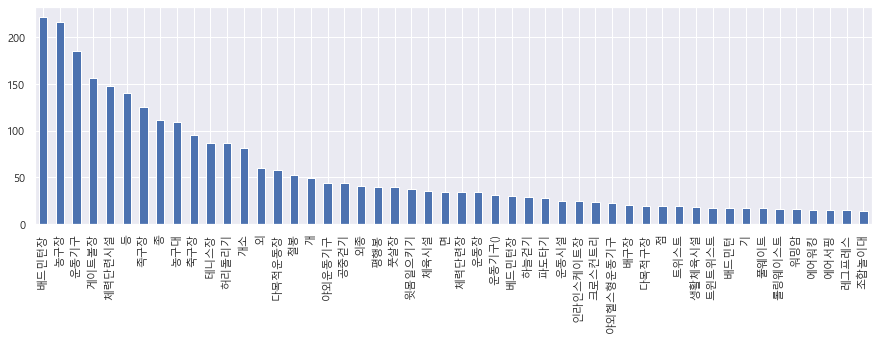

In [41]:
#gym_count 시각화
gym_count.head(50).plot.bar(figsize=(15,4))
#운동기구 외에 필요없는 값들이 보임 

### 2.6.2 워드클라우드로 빈도수 표현하기

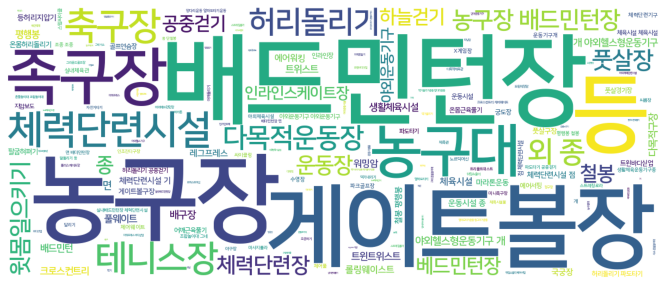

In [42]:
from wordcloud import WordCloud



word_draw = WordCloud(font_path=r"C:\Users\김선림\Downloads\NaverNanumSquare\NaverNanumSquare\NanumFontSetup_TTF_SQUARE\NanumSquare_acB.ttf",
                      width=1200, height=500,
                      stopwords=['운동기구','개소','외종'],#불용어 삭제
                      background_color='white'
                     
                     )


word_draw.generate(gym)



plt.figure(figsize=(15,5))
plt.figure
plt.imshow(word_draw)
plt.axis('off')
plt.show()

In [43]:
##함수로 만들어보기

def wordcloud(data,width=1200,height=500):
    word_draw = WordCloud(font_path=r"C:\Users\김선림\Downloads\NaverNanumSquare\NaverNanumSquare\NanumFontSetup_TTF_SQUARE\NanumSquare_acB.ttf",
                      width=width, height=height,
                      stopwords=['운동기구','개소','외종'],#불용어 삭제
                      background_color='white',
                      random_state=42#그릴때마다 다른 워드클라우드가 생기는데, 안변하게해줌
                     )


    word_draw.generate(data)



    plt.figure(figsize=(15,5))
    plt.figure
    plt.imshow(word_draw)
    plt.axis('off')
    plt.show()

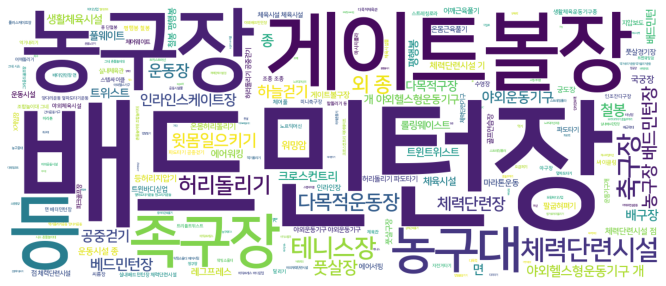

In [44]:
##위에 만든 함수 사용

wordcloud(gym)
#그릴때마다 다른 워드클라우드가 생김

### 2.6.3 편익시설

In [45]:
df['공원보유시설(편익시설)'].value_counts()

화장실                   1037
벤치                     193
정자,벤치                  137
음수대                    127
파고라                    116
                      ... 
파고라1,의자8                 1
파고라3,의자25                1
파고라3,의자15                1
의자11,음수대1                1
주차장, 화장실, 음수대,공중전화       1
Name: 공원보유시설(편익시설), Length: 1102, dtype: int64

In [46]:
# 편익시설에서 필요 없는 문자를 제거하고
# 토큰화를 위해 각 시설을 "," 로 구분하도록 전처리를 하는 함수를 구현합니다. 
# 함수명은 get_string 으로 합니다.

def get_string(text):
    if pd.isna(text):
        return text
    
    text= re.sub("[\d\.'\-(nan)\[\]\/]","",text) 
    text = re.sub(" ", "", text) #공백제거 
    text = re.sub(",{2,}", ",", text)#컴마 두개인것을 한개로 변경
    return text

In [47]:
# 함수가 잘 구현되었는지 확인해 봅니다.
# 다음의 문자를 전처리 했을 때  
# "[1. '화장실' 5, 2. 주차장, -, nan]" 전처리 후 '화장실,주차장,' 가 출력되는지 확인해 주세요.

get_string("[1. '화장실' 5, 2. 주차장, -, nan, /]")

'화장실,주차장,'

In [48]:
#결측치 넣어보기 

get_string(np.nan)

nan

In [49]:
# map을 통해 위에서 구현한 함수를 적용해 봦 
#원본과 비교해보기 위해 편익 시설이라는 새로운 컬럼 만들어보자

df['편익시설']=df['공원보유시설(편익시설)'].map(get_string)
df['편익시설'].head()

0    화장실
1    NaN
2    NaN
3    NaN
4    NaN
Name: 편익시설, dtype: object

In [50]:
df['편익시설'].value_counts()

#컴마로 이어져있는 데이터 전처리 하기 

화장실                      1086
                          213
벤치                        193
정자,벤치                     165
주차장,화장실                   141
                         ... 
파고라,전망데크,벤치,화장실             1
주차장,매점,화장실,음수대등             1
자전거보관대,파고라,벤치,안내판           1
자전거보관대,하고라,벤치,안내판,파고라       1
주차장,화장실,음수대,공중전화            1
Name: 편익시설, Length: 730, dtype: int64

In [51]:
type(np.nan)

float

In [52]:
# 문자열을 연결해 주는 join 으로 편익시설을 연결해 주는 방법이 있습니다.
# 이 때, 결측치가 있으면 결측치는 숫자형태이기 때문에 문자와 연결되지 않아 오류가 납니다.
# 따라서 결측치를 제외한 값만 가져와서 연결합니다.

fac=",".join(df.loc[df['편익시설'].notnull(),'편익시설'])
fac= get_string(fac)
fac[:100]
              

'화장실,화장실,화장실,주차장,관리사무소,화장실,화장실,화장실,주차장,화장실,주차장,화장실,주차장,문화회관,화장실,화장실,화장실,음수전,음수전,주차장,주차장,화장실,화장실,주차장,화'

In [53]:
#위와는 다른 방법
# 위에서 전처리한 "편익시설" 컬럼을 리스트 형태로 만들고 다시 str 으로 변환 합니다. 
# 위에서 만든 get_string 함수로 전처리를 합니다.

fac= str(df['편익시설'].tolist())
fac=get_string(fac)
fac[:100]

'화장실,화장실,화장실,주차장,관리사무소,화장실,화장실,화장실,주차장,화장실,주차장,화장실,주차장,문화회관,화장실,화장실,화장실,음수전,음수전,주차장,주차장,화장실,화장실,주차장,화'

In [54]:
# ,가 2개 이상 들어가면 하나로 변경합니다.
# '화장실,주차장,,,' 텍스트를 정규표현식으로 바꿔봅니다

re.sub(",{2,}",",",'화장실,주차장,,,')

'화장실,주차장,'

In [55]:
# 다시 ","로 텍스트를 분리하고 판다스의 Series 형태로 만들고 value_counts 로 빈도수를 계산합니다.
fac_count = pd.Series(fac.split(",")).value_counts()
fac_count.head()

화장실    1921
파고라     817
벤치      650
정자      535
주차장     502
dtype: int64

<AxesSubplot:>

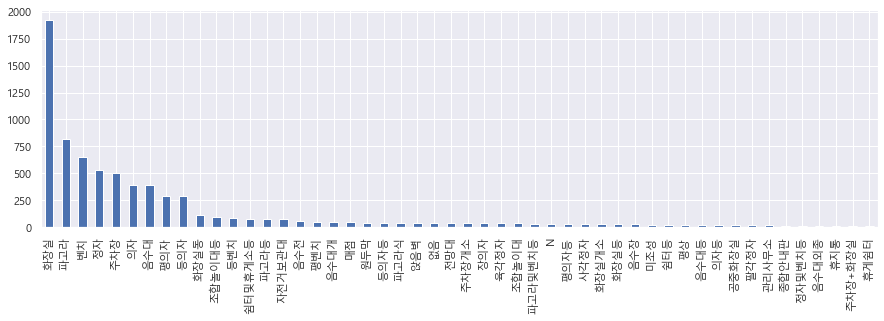

In [56]:
#상위 50개 단어에 대해 막대그래프를 그려보자


fac_count.head(50).plot.bar(figsize=(15,4))

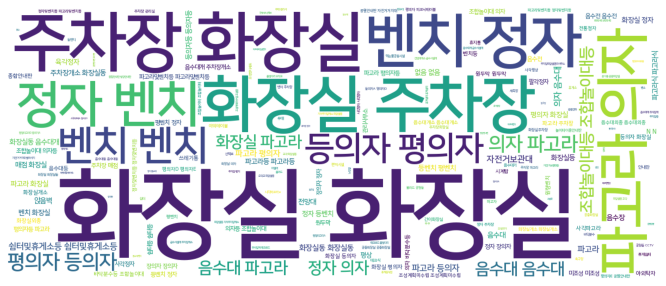

In [57]:
wordcloud(fac)

#같은 단어가 많이 들어가 있음 
#화장실, 화장실동, 공중화장실, 화장실+주차장 이런 단어가 있음 
#데이터 전처리가 더 필요해보임 

### 2.6.4 키워드 별 빈도수 구하기

In [58]:
# "공원보유시설(편익시설)" 에서 문자열 처리를 하기 위해 결측치를 제외한 값을 가져옵니다.
# df_fac 이라는 변수에 담습니다.

#내가 구하고자 하는 시설 변수에 담기 
facilities = ["화장실", "주차장", "음수대", "파고라", "정자", 
              "벤치", "의자", "놀이터", "축구장", "야영장", "CCTV"]

df_fac = df[df["공원보유시설(편익시설)"].notnull()] #데이터 있는것만 가져옴 

In [59]:
# facilities 리스트에 있는 값으로 for문을 활용해 컬럼을 만듭니다.
# 해당 단어가 들어가면 True, 아니면 False로 값이 표현되도록 합니다.

for f in facilities:
    df[f]=df_fac["공원보유시설(편익시설)"].str.contains(f)
    

In [60]:
#facilities리스트로 만든 각 컬럼의 빈도수 구하기

df[facilities].sum()

화장실     2208
주차장      611
음수대      493
파고라     1032
정자       648
벤치       850
의자       949
놀이터       21
축구장        6
야영장        3
CCTV       6
dtype: object

In [61]:
df.head(3)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,고시연도,고시월,편익시설,화장실,주차장,음수대,파고라,정자,벤치,의자,놀이터,축구장,야영장,CCTV
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2011.0,9.0,화장실,True,False,False,False,False,False,False,False,False,False,False
1,26440-00002,압곡공원,근린공원,부산광역시 강서구 구랑동 1219,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2008.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26440-00003,서연정공원,소공원,부산광역시 강서구 대저1동 1330-7,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2013.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.7 특정 정보 마스킹

### 2.7.1 전화번호 마스킹


In [62]:
# 가운데가 4자리일 때 번호 마스킹 "010-1234-5678"
# re.sub("규칙", "패턴", "데이터")
# 규칙
# (\d{3}) 는 숫자 3자리를 의미합니다.
# (\d{1,2}) 는 숫자 1~2자리를 의미합니다.
# 패턴
# r"\1-\2**-**\5" 의 "\숫자"는 앞에서 () 안에 정의한 값의 순서를 의미합니다. 
# 변수의 순서라고 생각해도 됩니다.
# 여기에서 \3, \4는 쓰지 않고 * 로 대체했습니다.
# r은 raw를 의미합니다.



re.sub("\d", "*", "010-1234-5678") #모든 숫자 *
re.sub("\d{3}", "***", "010-1234-5678")# 숫자 3자리 만 마스킹
re.sub("(\d{3})-(\d{4})-(\d{4})", r"\1-****-\3", "010-1234-5678") #'010-****-5678'
re.sub("(\d{3})-(\d{2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "010-1234-5678")


'010-12**-**78'

In [63]:
#가운데가 3자리일때 번호 마스킹이 잘 동작 하는지 확인 010-123-5678
#d{1,2} 1~2자리인 경우 

re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "010-123-5678")

'010-1**-**78'

In [64]:
#가운데가 2자리인 경우 마스킹 없이 보이는지 확인 010-12-5678


re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "010-12-5678")

#자릿수 안맞아서 정규식이 안먹음 

'010-12-5678'

In [65]:
#국가 번호가 들어갈떄 확인하기 +82-10-1234-5678

re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "+82-10-1234-5678")

#자릿수 안맞아서 정규식이 안먹음 

'+82-10-1234-5678'

In [66]:
# 함수를 통해 가운데 들어오는 번호를 마스킹 하도록 처리
# 국제번호 등 다양한 형식의 번호가 들어왔을 때 
# - 를 기준으로 뒤에서 두 번째 항목을 마스킹 처리 하되, 
# 마지막 자리는 앞 두자리만 마스킹 합니다.
# 함수명은 mask_phone_number 로 합니다.

phone = '+82-10-1234-5678'

def mask_phone_number(phone):
    if pd.isnull(phone):
        return phone  #결측치 예외처리 
    
    num= phone.split("-")
    num_len= len(num)//2 #가운데 숫자 
    
    num[num_len]=re.sub("\w","*",num[num_len]) #가운데 문자만 &로 출력
    
    num[-1]=re.sub("(\d{2})(\d{2})", r"\1**",num[-1])  #뒷번호 마스킹, r는 로우 표시 
    
    
    
    return "-".join(num) #문자열 조인해서 num하는데 -로 연결하기




mask_phone_number(phone)

'+82-10-****-56**'

In [67]:
# 위에서 만든 함수 map을 통해 적용 

df['전화번호(전처리)']=df['전화번호'].map(mask_phone_number)

df[['공원명','전화번호','전화번호(전처리)']].head()
#와우~~

,공원명,전화번호,전화번호(전처리)
0,구랑공원,051-970-4536,051-***-45**
1,압곡공원,051-970-4536,051-***-45**
2,서연정공원,051-970-4536,051-***-45**
3,용두공원,051-970-4536,051-***-45**
4,새동내공원,051-970-4536,051-***-45**


### 2.7.2 이메일 주소 마스킹

In [68]:
# 이메일 주소의 형식만 남기고 모두 마스크처리 합니다.

email = "address@mail.com"

re.sub("[^@.]","x",email) #골뱅이와 점을 제외한 나머지 문자 마스크 처리 


'xxxxxxx@xxxx.xxx'

In [69]:
# 이메일 주소 아이디의 일부만 마스크처리 합니다. 
# 이 때 맨 앞과 맨 뒤 문자는 그대로 놔두고 나머지 문자에 대해 마스크 처리리를 합니다.
email = "address@mail.com"

address, domain= email.split("@")
mask=re.sub("\w","*",address[1:-1]) # 맨앞문자랑 맨 뒷문자 뺴고 , 해당되는 문자만 마스크 처리 
print(f"{address[0]}{mask}{address[-1]}@ {domain}")
print(email)

a*****s@ mail.com
address@mail.com


In [70]:
#위의 예제 함수로 만들기 

def mask_email(email):
    address, domain= email.split("@")
    mask=re.sub("\w","*",address[1:-1]) # 맨앞문자랑 맨 뒷문자 뺴고 , 해당되는 문자만 마스크 처리 
    return (f"{address[0]}{mask}{address[-1]}@ {domain}")

    
mask_email(email)

'a*****s@ mail.com'

In [71]:
# "1234address_123@gmail.com"를 마스킹 처리 합니다.

mask_email("1234address_123@gmail.com")

'1*************3@ gmail.com'

### 2.7.3 자동차 등록번호 마스킹 

In [72]:
# 자동차 등록번호를 마스킹 합니다. 
# r'*\2\3**\5' 여기에서 \1 에 해당되는 한글 앞의 숫자는 
# 몇 자리가 들어가든 한글 바로 앞의 마지막 한자리만 봅니다.
# 따라서 앞에 있는 숫자는 마지막 번호만 마스킹 하게 됩니다.
car_num = "132가1234"
9
re.sub("([0-9])([가-힣])([\d])([\d{2}])([\d])",r"*\2\3\**\5",car_num)

'13*가1\\**34'

In [73]:
# 자동차 등록번호를 마스킹 합니다. 
car_num = "안녕하세요. 자동차 등록 번호는 132가1234 입니다."

re.sub("([0-9])([가-힣])([\d])([\d]{2})([\d])", r"*\2\3**\5", car_num)

'안녕하세요. 자동차 등록 번호는 13*가1**4 입니다.'

## 3 데이터 요약하기 

### 3.1 수치형, 범주형 변수 구분하기 

In [75]:
#data_types 변수에 데이터 타입만 따로 모으기 

data_types=df.dtypes
data_types.head()

관리번호        object
공원명         object
공원구분        object
소재지도로명주소    object
소재지지번주소     object
dtype: object

### 3.2 수치형 변수 요약

In [80]:
# 수치형 변수 구하기 

var_numbers=data_types[data_types != 'object'] #수치형만 가져오기
var_numbers=var_numbers.index.tolist()
var_numbers

['위도', '경도', '공원면적', '지정고시일', '고시연도', '고시월']

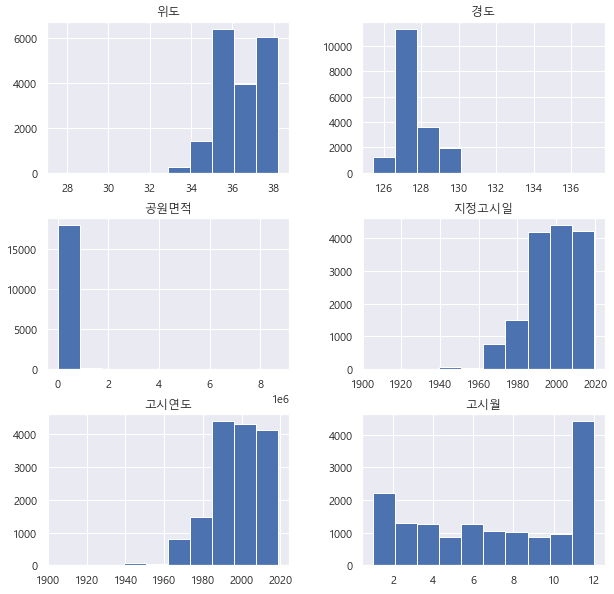

In [83]:
#히스토 그램 
#수치형만 알아서 히스토로 그려줌

h=df.hist(figsize=(10,10))

In [84]:
#수치형 변수만 요약 
df.describe

<bound method NDFrame.describe of               관리번호        공원명   공원구분                소재지도로명주소  \
0      26440-00001       구랑공원   문화공원    부산광역시 강서구 구랑동 1199-7   
1      26440-00002       압곡공원   근린공원      부산광역시 강서구 구랑동 1219   
2      26440-00003      서연정공원    소공원   부산광역시 강서구 대저1동 1330-7   
3      26440-00004       용두공원  어린이공원  부산광역시 강서구 대저2동 1870-67   
4      26440-00005      새동내공원  어린이공원   부산광역시 강서구 대저2동 2407-1   
...            ...        ...    ...                     ...   
18132  28140-00009      송림4공원  어린이공원      인천광역시 동구 송림동 291-6   
18133  47760-00002       서부공원   근린공원    경상북도 영양군 영양읍 서부리 123   
18134  47760-00003       입암공원   근린공원  경상북도 영양군 입암면 신구리 산27-5   
18135  47760-00004       수비공원   근린공원    경상북도 영양군 수비면 발리리 산48   
18136  47760-00005  삼지연꽃 테마파크   수변공원    경상북도 영양군 영양읍 삼지리 200   

                      소재지지번주소         위도          경도      공원면적 공원보유시설(운동시설)  \
0        부산광역시 강서구 구랑동 1199-7  35.157215  128.854935    9137.0            4   
1          부산광역시 강서구 구랑동 1219  35.15465

## 3.3 범주형 변수 요약

In [87]:
var_objects=data_types[data_types == 'object']
var_objects=var_objects.index.tolist() #투리스트하면 컬럼명만 가져옴
var_objects[:5]

['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소']

In [89]:
#문자열 타입 요약 

df[var_objects].describe()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,편익시설,화장실,주차장,음수대,파고라,정자,벤치,의자,놀이터,축구장,야영장,CCTV,전화번호(전처리)
count,18137,18137,18137,18137,17158,4845,6964,5084,1160,3116,17383,16957,18137,18137,18137,18137,18137,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084,16957
unique,14710,12423,10,15186,14419,1485,1237,1102,378,993,279,497,112,219,219,17,232,730,2,2,2,2,2,2,2,2,2,2,2,240
top,31110-60001,공원,어린이공원,전라남도 무안군 삼향읍 남악리 미지정 간척지,전라남도 무안군 삼향읍 남악리 미지정 간척지,운동기구,조합놀이대,화장실,-,-,경상남도 창원시청,055-212-4501,2019-09-24,5670000,경상남도 창원시,경기도,창원시,화장실,False,False,False,False,False,False,False,False,False,False,False,055-***-45**
freq,124,145,9987,18,18,360,1526,1037,250,141,1176,344,1344,1176,1176,3318,1176,1086,2876,4473,4591,4052,4436,4234,4135,5063,5078,5081,5078,1158


### 3.4 crosstab
- 범주형 변수 요약 

In [93]:
#관리기관과 공원구분에 따른 빈도수 파악
manage_category=pd.crosstab(index=df['관리기관명'],columns=df['공원구분'])

manage_category[manage_category['체육공원']>5].style.background_gradient()

공원구분,근린공원,기타,도시농업공원,묘지공원,문화공원,소공원,수변공원,어린이공원,역사공원,체육공원
관리기관명,,,,,,,,,,
경기도 김포시 체육과,0,0,0,0,0,0,0,0,0,7
경기도 남양주시청,33,0,0,2,5,25,4,68,4,6
경기도 시흥시청,37,0,1,0,7,6,3,72,0,6
경상남도 창원시청,224,0,0,8,8,100,0,816,0,20
대전광역시 대덕구청,11,1,0,0,3,8,0,50,1,6
성남시 공원과,50,0,0,1,0,0,0,0,2,6
전라남도 장성군청,14,0,0,0,4,118,2,10,2,6


In [96]:
#시도별 공원 구분의 수를 구하기 

city_category=pd.crosstab(index=df['시도'],columns=df['공원구분'])
city_category.style.background_gradient()

공원구분,근린공원,기타,도시농업공원,묘지공원,문화공원,소공원,수변공원,어린이공원,역사공원,체육공원
시도,,,,,,,,,,
강원도,141,0,2,1,8,85,10,391,4,6
경기도,806,17,1,8,91,406,61,1821,34,73
경상남도,390,0,3,8,25,178,17,1161,12,31
경상북도,178,3,0,0,18,100,26,575,11,6
광주광역시,97,0,0,0,0,18,5,305,1,3
대구광역시,125,0,0,0,5,57,6,381,2,10
대전광역시,99,1,0,1,12,47,12,315,1,9
부산광역시,144,16,1,2,14,96,9,365,3,3
서울특별시,332,70,4,1,19,183,4,1117,11,4


## 4. 시도별 공원 분호 

### 4.1 시도별 공원 비율

In [109]:
# 시도별로 합계 데이터를 출력 

city_count=df['시도'].value_counts().to_frame()
city_mean= df['시도'].value_counts(normalize=True).to_frame()
city_count

,시도
경기도,3318
전라남도,1882
경상남도,1825
서울특별시,1745
충청남도,1723
전라북도,1137
경상북도,917
충청북도,899
울산광역시,887
인천광역시,675


In [113]:
#합계와 비율을 하나의 표에 표현 

city = city_count.merge (city_mean, left_index=True, right_index=True)
city.columns=['합계','비율']
city.style.background_gradient()

,합계,비율
경기도,3318,0.182941
전라남도,1882,0.103766
경상남도,1825,0.100623
서울특별시,1745,0.096212
충청남도,1723,0.094999
전라북도,1137,0.062690
경상북도,917,0.050560
충청북도,899,0.049567
울산광역시,887,0.048906
인천광역시,675,0.037217


### 4.2 공원 구별 분포

<AxesSubplot:xlabel='경도', ylabel='위도'>

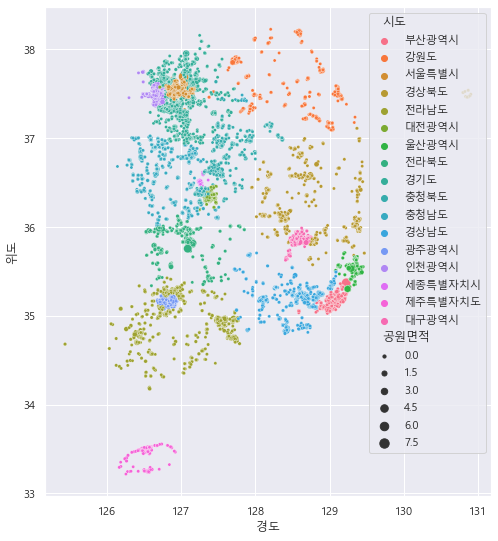

In [115]:
# "공원구분"별로 색상을 다르게 표현하고 "공원면적"에 따라 원의 크기를 다르게 그립니다.
# 제주도는 해안선과 유사한 모습으로 공원이 배치되어 있는 모습이 인상적입니다.
# df에는 전체 데이터 프레임이 df_park 에는 위경도의 이상치를 제거한 데이터가 들어있습니다.



plt.figure(figsize=(8, 9))
sns.scatterplot(data=df_park, x="경도", y="위도", 
                hue="시도", size="공원면적", sizes=(10, 100))

<AxesSubplot:xlabel='count', ylabel='시도'>

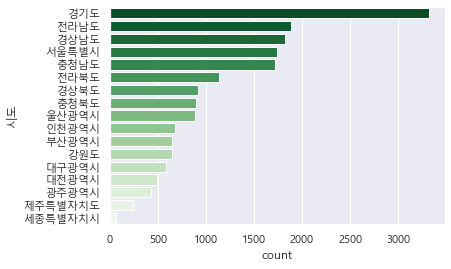

In [122]:
#countplot으로 시도별 빈도수 그리기 
sns.countplot(data=df, y='시도', order=city_count.index, palette='Greens_r') #빈도수가 높은 순으로 표시

### 4.4 특정 공원 구분 가져오기

In [123]:
# 공원 구분별로 빈도수 구하기 

df['공원구분'].value_counts

<bound method IndexOpsMixin.value_counts of 0         문화공원
1         근린공원
2          소공원
3        어린이공원
4        어린이공원
         ...  
18132    어린이공원
18133     근린공원
18134     근린공원
18135     근린공원
18136     수변공원
Name: 공원구분, Length: 18137, dtype: object>

In [124]:
# str.match를 통해 특정 텍스트가 들어가는 공원만 가져오기
# ".*"는 앞뒤로 어떤 문자가 등장하든 상관없다는 의미입니다.
# 따라서 아래의 정규표현식 대신 r'(역사|체육|수변|문화)공원'를 사용해도 똑같이 동작합니다.

park_type = r'.*((역사|체육|수변|문화)공원).*' # 특정단어가 들어간거 찾기

park = df[df["공원구분"].str.match(park_type)]
park.shape

(1017, 36)

In [125]:
var_numbers

['위도', '경도', '공원면적', '지정고시일', '고시연도', '고시월']

In [134]:
# 리스트 다루기 - var_pair 라는 변수에 리스트를 만들어서 값을 추가하고 삭제해 봅니다.
# 기존 리스트에 "공원구분" 원소 추가하기 "공원구분"에 따라 색상을 다르게 표현해 보기 위함
# var_pair 라는 변수에 담습니다.

var_pair= var_numbers
var_pair.append('공원구분')
var_pair

['위도', '경도', '공원면적', '공원구분', '공원구분']

In [143]:

#var_pair.remove("지정고시일")
#var_pair.remove("고시연도")
#var_pair.remove("고시월")
var_pair.remove("공원구분")
var_pair

['위도', '경도', '공원면적', '공원구분']

In [144]:
var_pair

['위도', '경도', '공원면적', '공원구분']

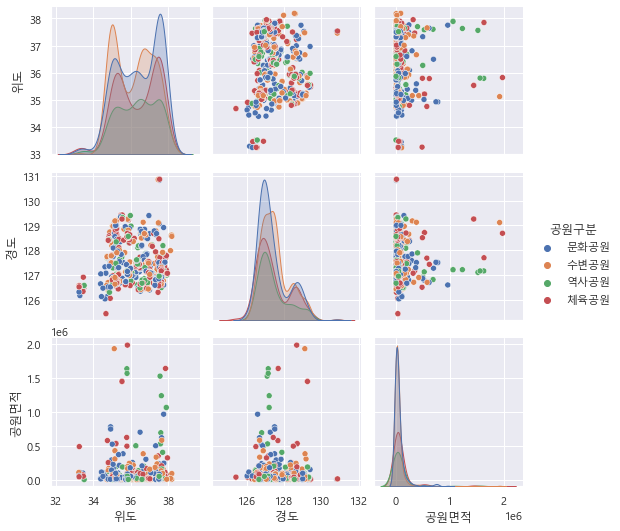

In [145]:
# 위에서 가져온 var_pair 라는 변수에 담긴 리스트에 있는 컬럼을 사용해 pairplot을 그립니다.

sns.pairplot(park[var_pair], hue="공원구분")

### 4.5 피봇테이블로 시도별 공원수와 평균면적 구하기

In [150]:
# 시도별 공원수와 "공원면적" 컬럼의 평균값, 중앙값을 구합니다.
# style.background_gradient()를 사용해서 값의 많고 적음에 따라 다른 색상으로 표현되도록 합니다


park_size=pd.pivot_table(df, index='시도', values='공원면적',aggfunc=['count','mean','median'])
park_size.style.background_gradient()

,count,mean,median
,공원면적,공원면적,공원면적
시도,,,
강원도,648,29539.004630,1886.500000
경기도,3318,27628.744093,2527.900000
경상남도,1825,51390.226795,2163.000000
경상북도,917,29771.096947,2146.000000
광주광역시,429,20571.033333,2192.000000
대구광역시,586,28622.956143,2044.150000
대전광역시,497,36507.091952,2069.100000
부산광역시,653,54162.930521,2158.000000


## 4.6 내가 사는 지역의 공원을 지도에 표시해 보기

In [166]:
# 경기도 성남시에 위치한 공원만 출력해 봅니다.
# df_sn 이라는 변수에 담아서 재사용 합니다.
df_sn = df[(df["시도"] == "서울특별시") & (df["구군"] == "강서구")]
df_sn.shape

(139, 36)

In [167]:
df_sn[['시도','구군','공원명']].head()

,시도,구군,공원명
11759,서울특별시,강서구,우장
11760,서울특별시,강서구,궁산
11761,서울특별시,강서구,염창
11762,서울특별시,강서구,꿩고개
11763,서울특별시,강서구,봉제산


### 4.6.1 특정 공원 정보 찾아보기 


In [168]:
df_sn.loc[df_sn["공원명"].str.contains("염창"), ["공원명", "위도", "경도"]]

,공원명,위도,경도
11761,염창,37.557808,126.860243


In [169]:
# cols 컬럼에 특정 컬럼만 불러와서 봅니다.
# '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)' 
cols = "공원보유시설(운동시설)	공원보유시설(유희시설)	공원보유시설(편익시설)	공원보유시설(교양시설)"
cols = cols.split("\t") #탭으로 분리 


df_sn.loc[df_sn["공원명"].str.contains("화랑"), cols]

,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설)


### 4.6.2 지도에 표현하기

In [170]:
import folium 

m = folium.Map([37.557808, 126.860243], zoom_start=13)

for n in df_sn.index:
    lat= df_sn.loc[n,'위도']
    long= df_sn.loc[n,'경도']
    tooltip= df_sn.loc[n,'공원명']+""+df_sn.loc[n,'소재지도로명주소']
    
    folium.Marker([lat, long], tooltip=tooltip).add_to(m)
    
m